In [39]:
# import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
# load data

dados = pd.read_csv('db_Incedios.csv')

In [41]:
dados.rename(columns={
    'year':'Ano',
    'state':'Estado',
    'month':'Mês',
    'number':'Número',
    'date':'Data',
}, inplace=True)

dados.head()

,Ano,Estado,Mês,Número,Data
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


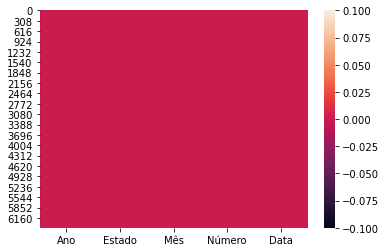

In [42]:
# Mapa de calor para verificar campos vazios
sns.heatmap(dados.isnull());

In [43]:
# table describe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ano     6454 non-null   int64  
 1   Estado  6454 non-null   object 
 2   Mês     6454 non-null   object 
 3   Número  6454 non-null   float64
 4   Data    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [44]:
#Número de queimadas por ano
analise = dados.groupby(by=['Ano']).sum()
analise.head()

,Número
Ano,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600


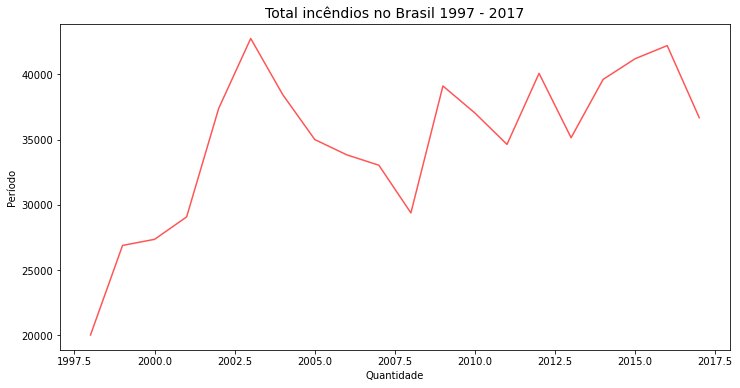

In [45]:
# gráfico das queimadas por ano
plt.figure(figsize=(12,6));

plt.title("Total incêndios no Brasil 1997 - 2017", loc='center', fontsize=14)
sns.lineplot(data=analise, x='Ano', y='Número', estimator='sum', color='#ff5555');

plt.xlabel('Quantidade')
plt.ylabel("Período");

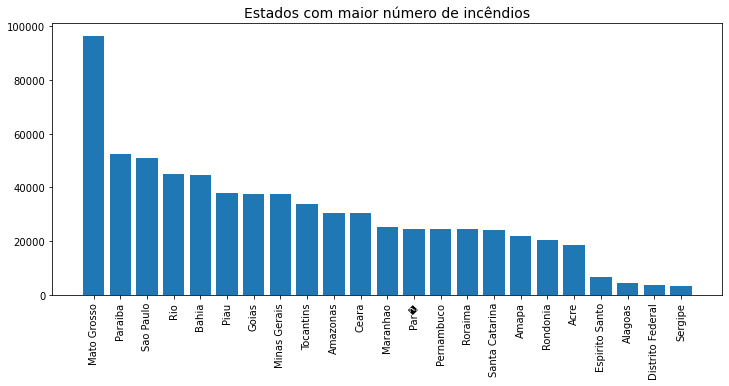

In [50]:
# Análise por ano dos incêndios

analise02 = dados.groupby(by=['Estado']).sum().reset_index()[['Estado','Número']].sort_values('Número', ascending=False)
analise02.head();

plt.figure(figsize=(12,5))

plt.title("Estados com maior número de incêndios", loc="center", fontsize=14)

plt.bar(analise02.Estado, analise02['Número']);

plt.xticks(rotation=90);